<a href="https://colab.research.google.com/github/mukhairatil/sentiment-analysis-indoroberta/blob/main/tes_penelitian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

In [ ]:
result, continuation_token = reviews(
    'id.co.bri.brimo',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=500
)

#id.co.bri.brimo → package BRImo
#sort=NEWEST → dari terbaru
#count=500 → ambil dulu banyak, nanti difilter

In [ ]:
df = pd.DataFrame(result)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b3f0c68b-6a67-45ac-8183-4b9f6ff62686,Farel Ariza,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat mudah digunakan,5,0,2.91.0,2025-12-18 07:49:56,"Hai Sobat BRI, terima kasih atas ulasannya 😊. ...",2025-12-18 07:57:40,2.91.0
1,7344abea-d9c0-4faa-bf58-d7f86451b9c6,gue aje,https://play-lh.googleusercontent.com/a-/ALV-U...,"mBanking terburuk, banyak user termasuk saya m...",1,0,None,2025-12-18 07:44:24,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-12-18 08:02:15,None
2,e029306e-6579-4d05-889e-fa567f20eb8c,Ahmad Rizqi ramadhan,https://play-lh.googleusercontent.com/a/ACg8oc...,Tiba-tiba biaya admin jadi 6k yang awalnya 5k,1,0,2.91.0,2025-12-18 07:35:27,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-12-18 07:55:05,2.91.0
3,af0101a4-8cbf-44bd-a277-92c62a958d0f,Samuel Mayona,https://play-lh.googleusercontent.com/a-/ALV-U...,berguna buat kita,5,0,2.91.0,2025-12-18 07:34:59,"Hai Sobat BRI, terima kasih atas ulasannya 😊. ...",2025-12-18 07:59:36,2.91.0
4,208708b8-573f-4238-9ec8-6004ef28ca58,Danu Alpriyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,"payah banget gak bisa Screenshot mutasi, padah...",5,0,2.87.1,2025-12-18 07:34:08,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-12-18 07:56:35,2.87.1


In [ ]:
df['at'] = pd.to_datetime(df['at'])

In [ ]:
df_desember = df[
    (df['at'].dt.month == 12) &
    (df['at'].dt.year == 2025)
]

In [ ]:
len(df_desember)

500

In [ ]:
df_100 = df_desember.head(100)

In [ ]:
df_100 = df_100[['content', 'score', 'at']]
df_100.columns = ['review', 'rating', 'date']

In [ ]:
df_100.head()

,review,rating,date
0,sangat mudah digunakan,5,2025-12-18 07:49:56
1,"mBanking terburuk, banyak user termasuk saya m...",1,2025-12-18 07:44:24
2,Tiba-tiba biaya admin jadi 6k yang awalnya 5k,1,2025-12-18 07:35:27
3,berguna buat kita,5,2025-12-18 07:34:59
4,"payah banget gak bisa Screenshot mutasi, padah...",5,2025-12-18 07:34:08


In [ ]:
len(df_100)

100

In [ ]:
df_100.to_csv("brimo_100_desember.csv", index=False)

In [ ]:
!ls

brimo_100_desember.csv	sample_data


In [ ]:
df = df_100.copy()

In [ ]:
print(len(df))

100


In [ ]:
df.isnull().sum()
#cek missing value

,0
review,0
rating,0
date,0


In [ ]:
df.columns


Index(['review', 'rating', 'date'], dtype='object')

In [ ]:
df = df.drop_duplicates(subset="review")

In [ ]:
import re
def clean_text(text):
    # Case folding
    text = text.lower()
    # Hapus mention, link, dan karakter spesial (noise)
    text = re.sub(r'@[A-Za-z0-9_]+|https?://\S+|#\S+|[^\w\s]', '', text)
    # Hapus angka yang tidak penting
    text = re.sub(r'\d+', '', text)
    # Contoh Normalisasi sederhana (bisa kamu tambah sendiri list-nya)
    norm_dict = {'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'bgt': 'banget', 'apps': 'aplikasi'}
    for word, replacement in norm_dict.items():
        text = re.sub(r'\b' + word + r'\b', replacement, text)
    return text.strip()



In [ ]:
df['cleaned_text'] = df['review'].apply(clean_text)

In [ ]:
df[["review", "cleaned_text"]].head()


,review,cleaned_text
0,sangat mudah digunakan,sangat mudah digunakan
1,"mBanking terburuk, banyak user termasuk saya m...",mbanking terburuk banyak user termasuk saya me...
2,Tiba-tiba biaya admin jadi 6k yang awalnya 5k,tibatiba biaya admin jadi k yang awalnya k
3,berguna buat kita,berguna buat kita
4,"payah banget gak bisa Screenshot mutasi, padah...",payah banget tidak bisa screenshot mutasi pada...


In [ ]:
# 3. LABELING
# 1-2: Negatif (0), 3: Netral (1), 4-5: Positif (2)
def create_label(score):
    if score <= 2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

In [ ]:
df['label'] = df['rating'].apply(create_label)

In [ ]:
df[["rating", "label"]].value_counts()


,,count
rating,label,
5,2,65
1,0,10
2,0,5
4,2,4
3,1,2


In [ ]:
df["label"].value_counts()


,count
label,
2,69
0,15
1,2


In [ ]:
df["text_length"] = df["cleaned_text"].apply(len)
df["text_length"].describe()

,text_length
count,86.000000
mean,50.604651
std,81.412137
min,0.000000
25%,12.000000
50%,23.000000
75%,48.000000
max,436.000000


In [ ]:
df = df[df["cleaned_text"].str.len() > 0]

In [ ]:
df["text_length"].describe()


,text_length
count,85.000000
mean,51.200000
std,81.706764
min,2.000000
25%,12.000000
50%,24.000000
75%,49.000000
max,436.000000


In [ ]:
# X berisi teks ulasan yang sudah dibersihkan
X = df["cleaned_text"]

# y berisi label sentimen (negatif, netral, positif)
y = df["label"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat encoder untuk mengubah label teks menjadi angka
label_encoder = LabelEncoder()

# Mengubah label sentimen menjadi angka
y_encoded = label_encoder.fit_transform(y)


In [ ]:
# Melihat urutan kelas sentimen
label_encoder.classes_

array([0, 1, 2])

In [ ]:
# Pastikan jumlah data sama
print(len(X), len(y_encoded))

85 85


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train (80%) dan test (20%)
# stratify=y → supaya proporsi sentimen tetap seimbang
# random_state=42 → supaya hasil bisa direproduksi
X_train, X_test, y_train, y_test = train_test_split(
    X,          # data teks
    y,          # label sentimen
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
print("Train data :", len(X_train))
print("Test data  :", len(X_test))

Train data : 68
Test data  : 17


In [ ]:
print(len(df))

85


In [102]:
# Reset index agar urut dari 0
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)


In [ ]:
import pandas as pd

print("Distribusi train:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi test:")
print(pd.Series(y_test).value_counts())


Distribusi train:
label
2    54
0    12
1     2
Name: count, dtype: int64

Distribusi test:
label
2    14
0     3
Name: count, dtype: int64


In [ ]:
# Install library transformers (biasanya sudah ada di Colab, tapi aman)
!pip install transformers

In [ ]:
from transformers import AutoTokenizer

# Load tokenizer IndoRoBERTa
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [103]:
train_encodings = tokenizer(
    list(X_train),
    padding=True,
    truncation=True,
    max_length=128
)

test_encodings = tokenizer(
    list(X_test),
    padding=True,
    truncation=True,
    max_length=128
)


In [ ]:
print(train_encodings.keys())

KeysView({'input_ids': [[2, 4076, 6385, 6060, 57, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 310, 1055, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 119, 166, 4594, 440, 8353, 6329, 2867, 423, 4122, 944, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 119, 173, 26, 2160, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2855

In [ ]:
print(train_encodings["input_ids"][0][:20])
print(train_encodings["attention_mask"][0][:20])


[2, 4076, 6385, 6060, 57, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [106]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.tolist()  # ✅ UBAH KE LIST

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])  # ✅ AMAN
        return item

    def __len__(self):
        return len(self.labels)



In [107]:
train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset  = SentimentDataset(test_encodings, y_test)

In [109]:
print(len(train_dataset))
print(len(test_dataset))

print(train_dataset[0])


68
17
{'input_ids': tensor([   2, 4076, 6385, 6060,   57,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [134]:
from huggingface_hub import login
login()



In [138]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "ihsan31415/indo-roBERTa-financial-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3
)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [139]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [141]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",           # versi lama
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False
)

In [142]:
from transformers import Trainer

trainer = Trainer(
    model=model,                    # IndoRoBERTa
    args=training_args,             # pengaturan training
    train_dataset=train_dataset,    # data latih
    eval_dataset=test_dataset       # data uji
)

In [143]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,No log,0.704346
2,1.030600,0.451743
3,0.169700,0.441394


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=27, training_loss=0.4875143192432545, metrics={'train_runtime': 150.7101, 'train_samples_per_second': 1.354, 'train_steps_per_second': 0.179, 'total_flos': 7967403180576.0, 'train_loss': 0.4875143192432545, 'epoch': 3.0})

In [144]:
# Melakukan prediksi pada data test
predictions = trainer.predict(test_dataset)

In [145]:
import numpy as np

# Ambil label prediksi (hasil model)
y_pred = np.argmax(predictions.predictions, axis=1)

# Ambil label asli
y_true = predictions.label_ids

In [146]:
from sklearn.metrics import classification_report, accuracy_score

In [147]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7647058823529411


In [148]:
import numpy as np

print("Label asli di test:", np.unique(y_true))
print("Label prediksi:", np.unique(y_pred))


Label asli di test: [0 2]
Label prediksi: [0 2]


In [149]:
import pandas as pd

pd.Series(y_true).value_counts()


,count
2,14
0,3


In [150]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    labels=[0, 1, 2],
    target_names=["Negatif", "Netral", "Positif"],
    zero_division=0
))


              precision    recall  f1-score   support

     Negatif       0.40      0.67      0.50         3
      Netral       0.00      0.00      0.00         0
     Positif       0.92      0.79      0.85        14

    accuracy                           0.76        17
   macro avg       0.44      0.48      0.45        17
weighted avg       0.83      0.76      0.79        17



In [151]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

In [152]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_true,
    y_pred,
    labels=[0, 1, 2]
)

cm_df = pd.DataFrame(
    cm,
    index=["Negatif", "Netral", "Positif"],
    columns=["Negatif", "Netral", "Positif"]
)

cm_df


,Negatif,Netral,Positif
Negatif,2,0,1
Netral,0,0,0
Positif,3,0,11


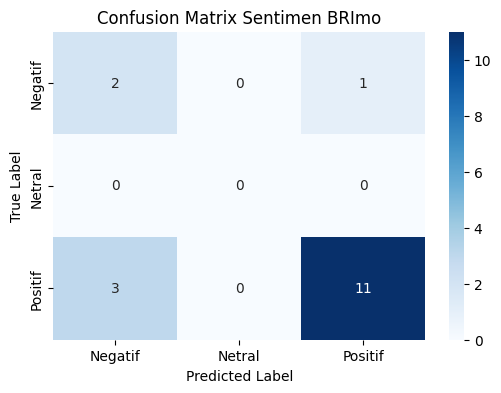

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Sentimen BRImo")
plt.show()


In [155]:
def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )
    outputs = model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()

    label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}
    return label_map[pred]

predict_sentiment("Aplikasi BRImo sangat membantu transaksi sehari-hari")


'Negatif'

In [156]:
# Daftar aspek dan kata kunci
aspek_dict = {
    "Login": ["login", "masuk", "otp", "verifikasi"],
    "Transaksi": ["transfer", "pembayaran", "top up", "saldo"],
    "Performa": ["lambat", "error", "lemot", "crash"],
    "Keamanan": ["aman", "keamanan", "pin", "biometrik"]
}


In [170]:
def detect_aspect(text, aspek_dict):
    aspek_found = []
    for aspek, keywords in aspek_dict.items():
        for kw in keywords:
            if kw in text:
                aspek_found.append(aspek)
                break
    return aspek_found


In [171]:
df["aspek"] = df["cleaned_text"].apply(
    lambda x: detect_aspect(x, aspek_dict)
)


In [159]:
df[["cleaned_text", "aspek"]].head()


,cleaned_text,aspek
0,sangat mudah digunakan,[]
1,mbanking terburuk banyak user termasuk saya me...,[Login]
2,tibatiba biaya admin jadi k yang awalnya k,[]
3,berguna buat kita,[]
4,payah banget tidak bisa screenshot mutasi pada...,[]


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [160]:
df_aspek = df.explode("aspek")
df_aspek = df_aspek.dropna(subset=["aspek"])


In [161]:
sentimen_map = {
    0: "Negatif",
    1: "Netral",
    2: "Positif"
}

df_aspek["sentimen_label"] = df_aspek["label"].map(sentimen_map)


In [163]:
aspek_sentimen = (
    df_aspek
    .groupby(["aspek", "sentimen_label"])
    .size()
    .reset_index(name="jumlah")
)

aspek_sentimen


,aspek,sentimen_label,jumlah
0,Keamanan,Negatif,2
1,Keamanan,Positif,5
2,Login,Negatif,7
3,Login,Positif,1
4,Performa,Negatif,2
5,Transaksi,Negatif,2
6,Transaksi,Netral,1
7,Transaksi,Positif,2


In [164]:
!pip install wordcloud

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

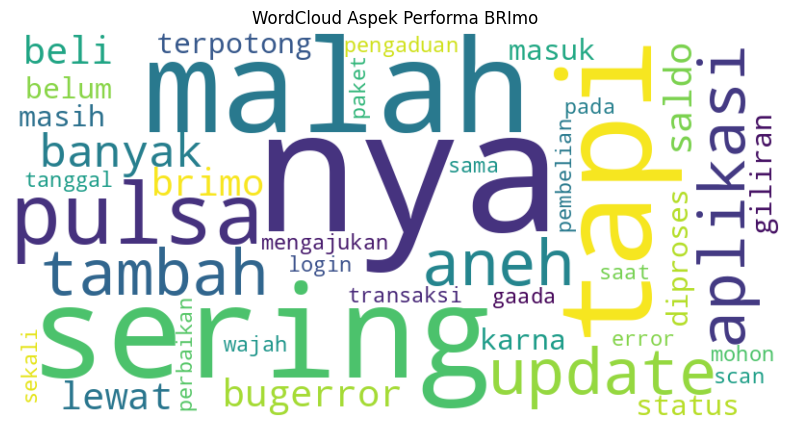

In [168]:
text_performa = " ".join(
    df_aspek[df_aspek["aspek"] == "Performa"]["cleaned_text"]
)

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text_performa)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Aspek Performa BRImo")
plt.show()
